In [4]:
path = 'D:/Weina/projects/RSNA_Pneumonia_Detection/'

class_path = path + 'stage_1_detailed_class_info.csv'

label_path = path + 'stage_1_train_labels.csv'

train_img_path = path + 'stage_1_train_images/'

test_img_path = path + 'stage_1_test_images'

In [3]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import pydicom


In [25]:
label = pd.read_csv(label_path)
classes = pd.read_csv(class_path)

In [17]:
print(sum(label['Target']==1)/label.shape[0])  # data imbalance

0.3092207389009624


In [35]:
sum(label['Target']==1)

8964

In [170]:
class_set = set(classes['class'])  # Lung Opacity = 1, otherwise = 0

In [36]:
sum(classes['class'] == 'Lung Opacity') == sum(label['Target']==1)

True

In [21]:
train_img = []
for root, dirs, files in os.walk(train_img_path):
    for name in files:
        if name[-3:] == 'dcm':
            train_img.append(name)
        

In [144]:
def plot_img_bbox(img, boxes_df):
    # plot the image and bboxes
    # Bounding boxes are defined as follows: x-min y-min width height
    fig, a = plt.subplots(1,1)
    fig.set_size_inches(10,10)
    a.imshow(img, cmap = 'gray')
    for index, row in boxes_df.iterrows():
        x, y, width, height  = row['x'], row['y'], row['width'], row['height']
        rect = patches.Rectangle((x, y),
                                 width, height,
                                 linewidth = 2,
                                 edgecolor = 'r',
                                 facecolor = 'none')

        # Draw the bounding box on top of the image
        a.add_patch(rect)
    plt.show()

In [192]:
def look_img(img_class=None, pID=None):
    if pID == None:
        if img_class == None:
            pID = classes['patientId'].sample(1).iloc[0]
            img_class = classes[classes['patientId']==pID]['class']
        else:
            pID = classes[classes['class'] == img_class]['patientId'].sample(1).iloc[0]
    dicom = pydicom.dcmread(train_img_path+pID+'.dcm')
    # get the image pixels
    img = dicom.pixel_array
    # get the bboxes, each box is one row
    boxes_df = label[label['patientId'] == pID]
    plot_img_bbox(img, boxes_df)
    # get age and gender
    age = int(dicom.PatientAge)
    gender = dicom.PatientSex
    print(img_class, '\n', age, gender, pID)

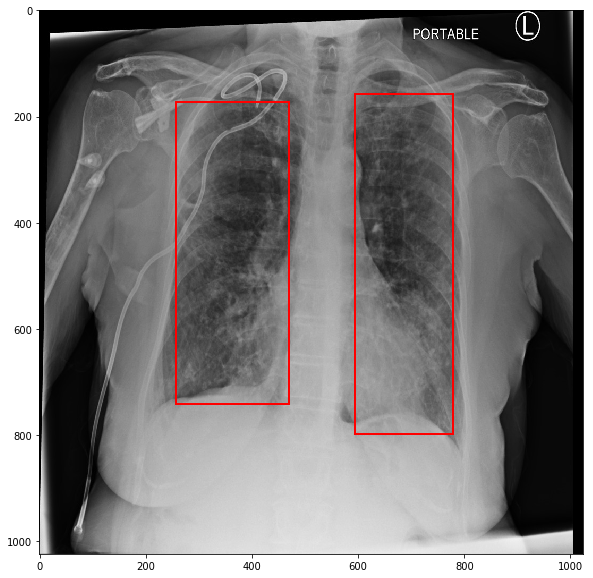

Lung Opacity 
 78 F bec35362-40e8-4f43-99aa-8d1eec483456


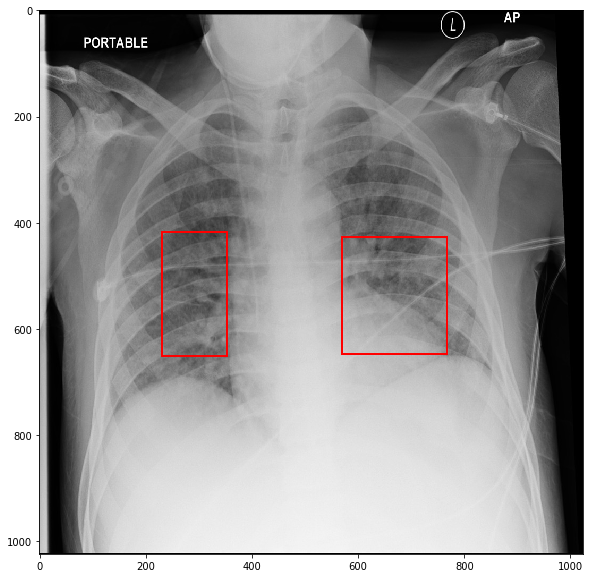

Lung Opacity 
 28 M 31a00524-b6eb-4d94-99ed-e70827499507


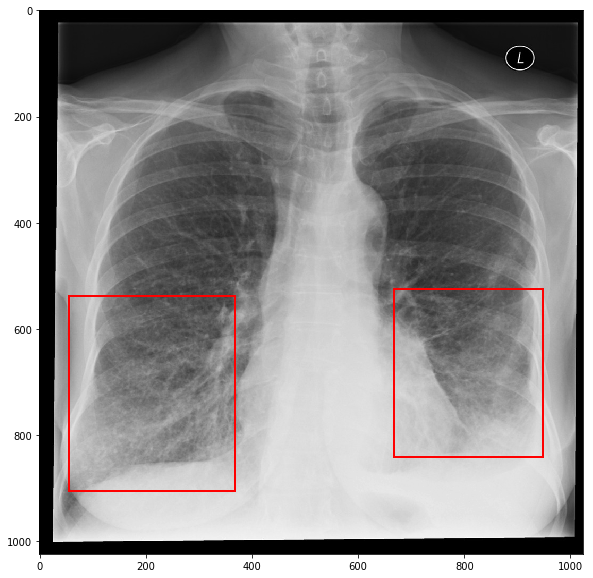

Lung Opacity 
 60 F 26950e98-3b48-4d7c-b2d0-daa4249be551


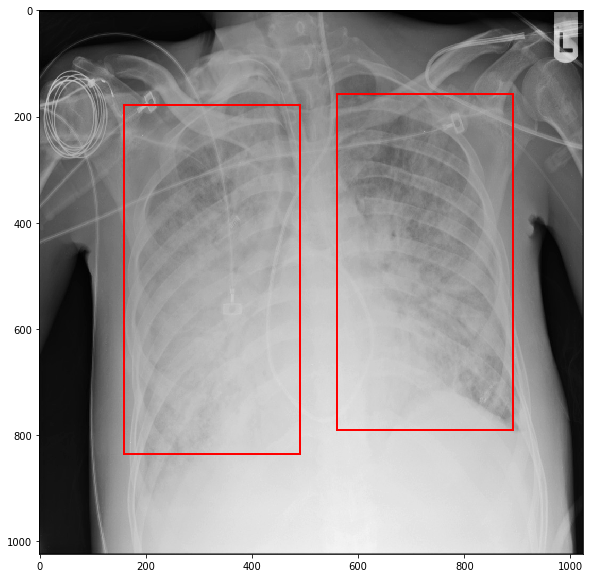

Lung Opacity 
 40 M b9bcc788-2f34-4af5-9fd5-ffeeee91eb04


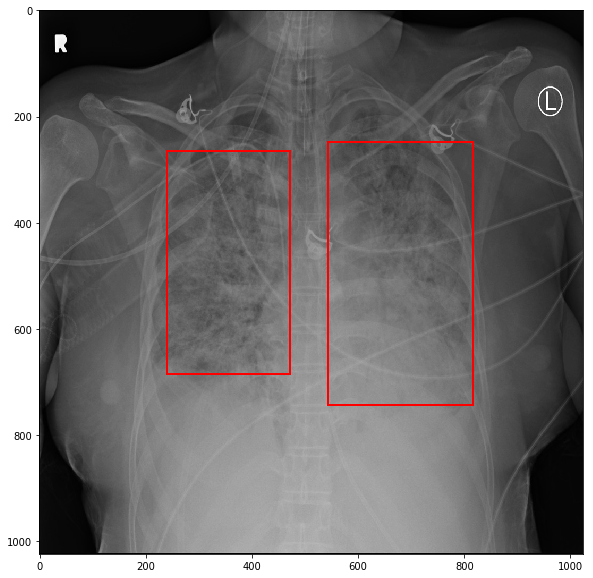

Lung Opacity 
 32 F 53d4697b-98ba-4dbc-892e-a602baec576b


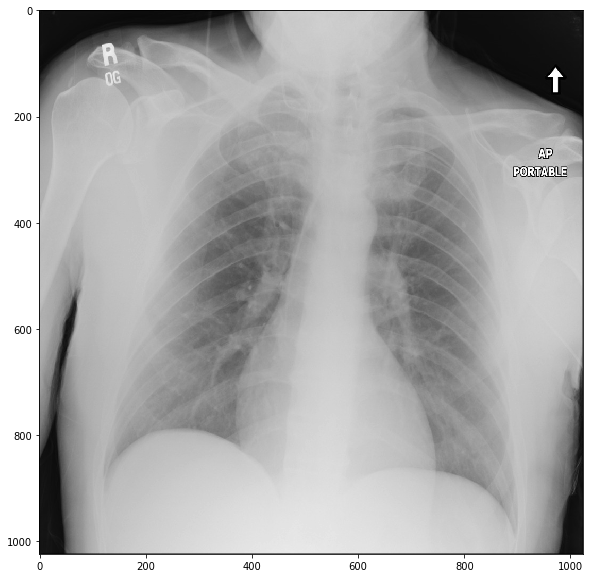

Normal 
 56 M 3761df44-73dd-4294-8200-d37dfbea1d87


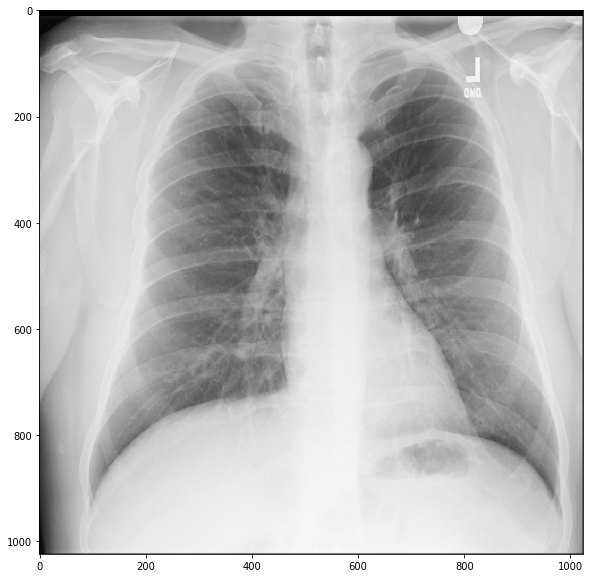

Normal 
 56 M f2baba6a-09c0-4d2d-b2a4-947f02132b9b


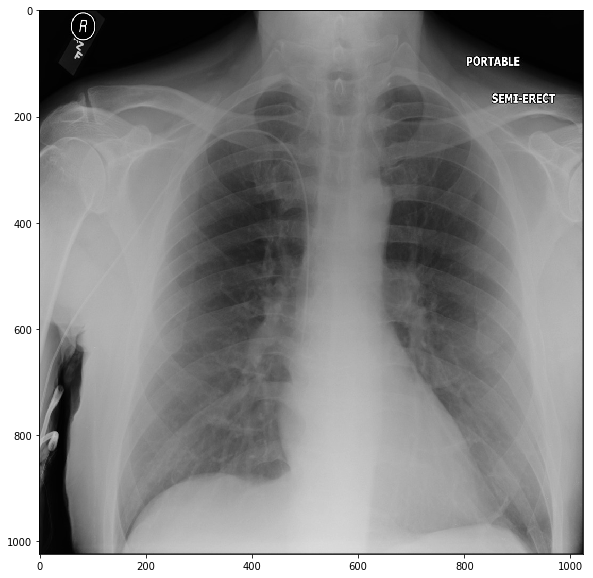

Normal 
 57 M 5fb80d4d-2b6d-4f26-a75f-5df4895f5779


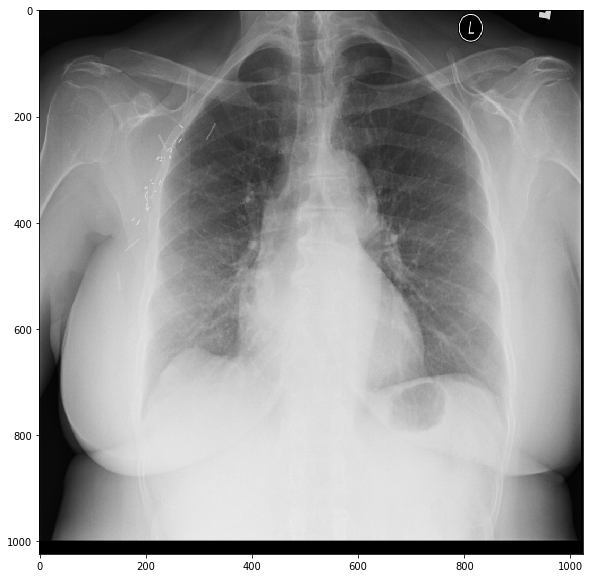

Normal 
 63 F d596c11d-ea61-448e-bf60-94473370eb54


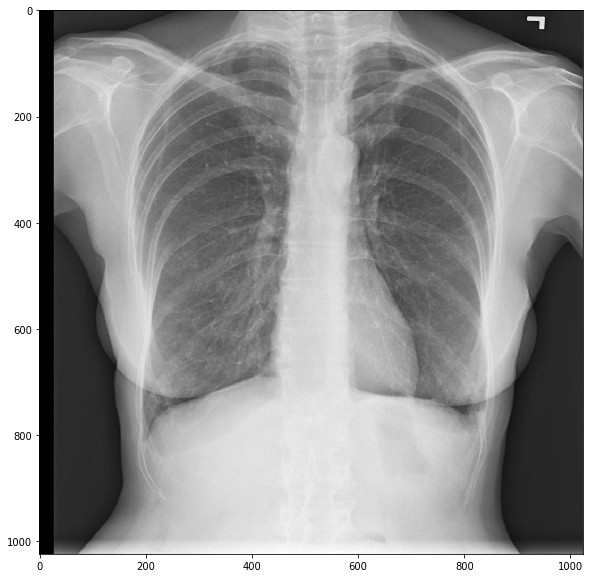

Normal 
 61 F 5b4f2412-5f8b-4567-bb93-bc767cb05405


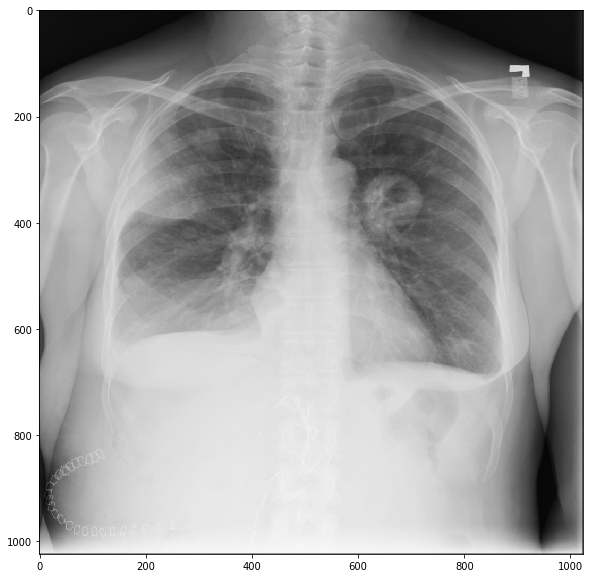

No Lung Opacity / Not Normal 
 53 F f53f445e-bd91-4aa3-86e4-b2acd8873b62


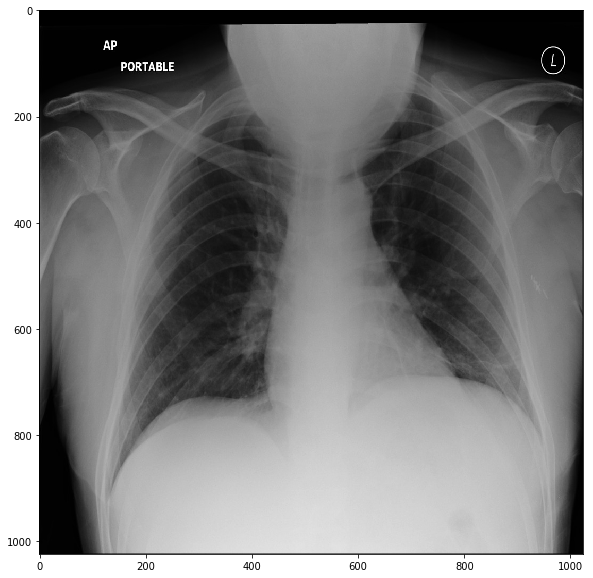

No Lung Opacity / Not Normal 
 44 M 78782186-6bf7-4155-93a4-dfb49338435b


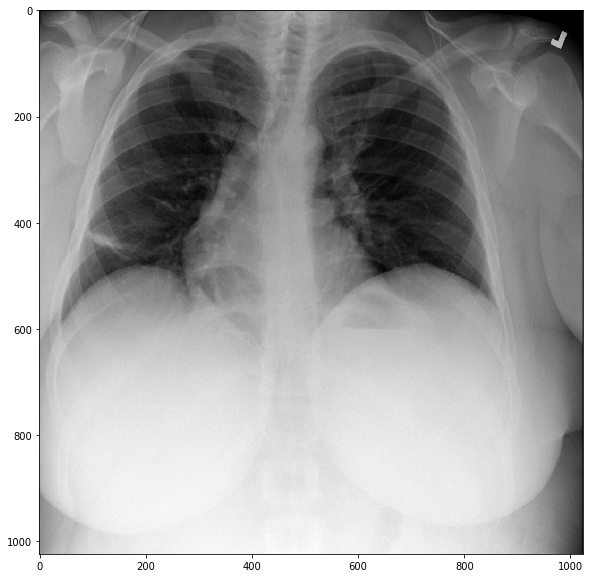

No Lung Opacity / Not Normal 
 30 M 48e40959-3a69-439d-a7d8-d3c037d6e151


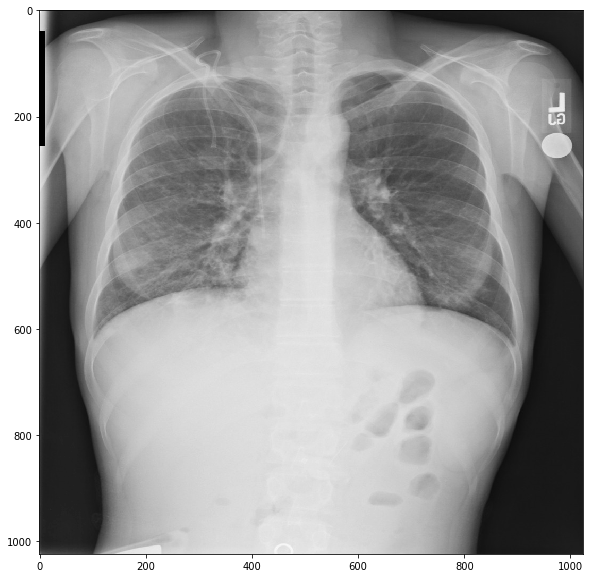

No Lung Opacity / Not Normal 
 22 F 81d27d73-7248-4cab-b618-8bd642f3611e


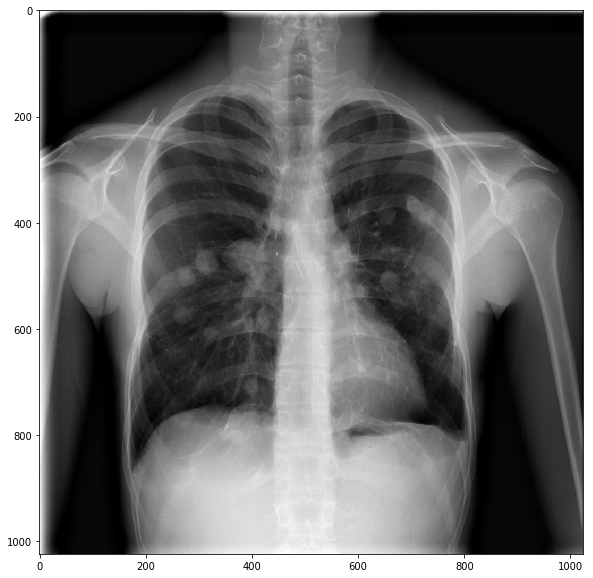

No Lung Opacity / Not Normal 
 23 M d4b94aea-e78b-4176-a1f8-e830470d7d64


In [172]:
for cls in class_set:
    for i in range(5):
        look_img(cls)

In [200]:
# check how many bbox max in a img
from collections import Counter
c = Counter(label['patientId'])
sort = sorted(c.items(), key=lambda item: item[1], reverse=True)
sort

[('32408669-c137-4e8d-bd62-fe8345b40e73', 4),
 ('3239951b-6211-4290-b237-3d9ad17176db', 4),
 ('8dc8e54b-5b05-4dac-80b9-fa48878621e2', 4),
 ('1bf08f3b-a273-4f51-bafa-b55ada2c23b5', 4),
 ('7d674c82-5501-4730-92c5-d241fd6911e7', 4),
 ('0d5bc737-03de-4bb8-98a1-45b7180c3e0f', 4),
 ('76f71a93-8105-4c79-a010-0cfa86f0061a', 4),
 ('349f10b4-dc3e-4f3f-b2e4-a5b81448ce87', 4),
 ('31764d54-ea3b-434f-bae2-8c579ed13799', 4),
 ('ee820aa5-4804-4984-97b3-f0a71d69702f', 4),
 ('0ab261f9-4eb5-42ab-a9a5-e918904d6356', 4),
 ('098e14d4-3205-4c2d-a059-738f830c0aa5', 3),
 ('648d7073-547d-4ce2-b91d-87436e5e7abf', 3),
 ('78c9b88e-a134-4470-b161-22e4a698206c', 3),
 ('f9230537-bb87-4de7-90f1-73bc730d4b3b', 3),
 ('3c1fdc6b-2e9a-46f7-8dbd-28d4155f9b93', 3),
 ('a4d40476-66d3-4733-9db5-63b4fd7215a8', 3),
 ('ebc03c6f-4bed-4b0b-a283-f0624a9955cd', 3),
 ('228b3dc1-f78a-4ac9-b213-2a416583d063', 3),
 ('338a1c2f-60a7-4656-ba2c-8c99103da696', 3),
 ('aac8b420-f849-4c60-8486-0155f282633b', 3),
 ('ec885fc7-04cc-47a5-b971-11ef284

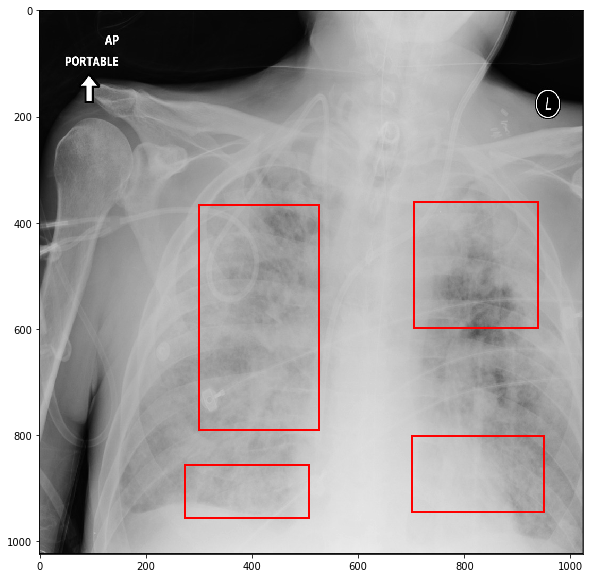

None 
 46 M 32408669-c137-4e8d-bd62-fe8345b40e73


In [214]:
look_img(pID = sort[0][0])

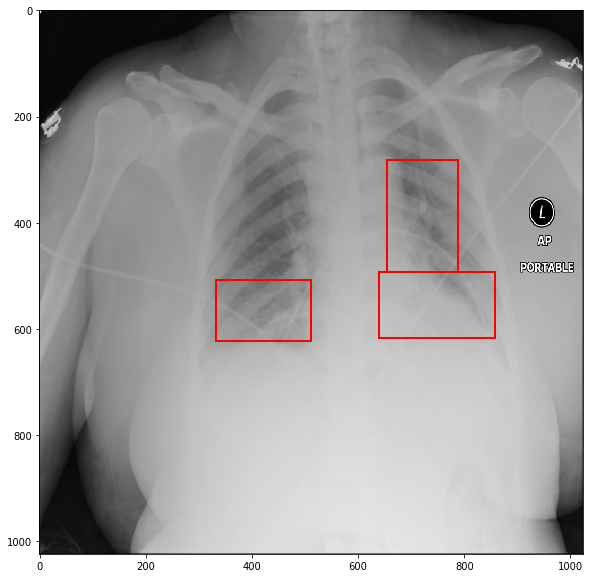

None 
 55 F 3c1fdc6b-2e9a-46f7-8dbd-28d4155f9b93


In [204]:
look_img(pID = sort[15][0])

In [215]:
# visualilze the distribution of the age, since childrn and infants' image size is different from adults
train_img

In [216]:
# Merging Boxes and Classes Datasets
assert classes['patientId'].values.tolist() == label['patientId'].values.tolist(), 'PatientId columns are different.'
df_train = pd.concat([classes, label.drop(labels=['patientId'], axis=1)], axis=1)
df_train.head(6)


patientId                         class      x  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal    NaN   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal    NaN   
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal    NaN   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal    NaN   
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity  264.0   
5  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity  562.0   

       y  width  height  Target  
0    NaN    NaN     NaN       0  
1    NaN    NaN     NaN       0  
2    NaN    NaN     NaN       0  
3    NaN    NaN     NaN       0  
4  152.0  213.0   379.0       1  
5  152.0  256.0   453.0       1

In [219]:
df_train.to_csv(path+'merged.csv')

In [5]:
df_train = pd.read_csv(path+'merged.csv')

In [55]:
# divide into train, val and test set
# 1. get unique pID
pID_set = set(df_train['patientId'].values)
len(pID_set)

25684

In [80]:
# 2. divide to train 0.7, val 0.15 and test set 0.15
from sklearn.model_selection import train_test_split
train_pID, valtest_pID = train_test_split(list(pID_set), test_size=0.3, random_state=2)

In [81]:
len(train_pID), len(valtest_pID)

(17978, 7706)

In [82]:
val_pID, test_pID = train_test_split(valtest_pID, test_size=0.5, random_state=2)

In [83]:
len(val_pID), len(test_pID)

(3853, 3853)

In [84]:
# get three csv files and calcuate the ratio of the target in each file
train_csv = df_train[df_train['patientId'].isin(train_pID)]
val_csv = df_train[df_train['patientId'].isin(val_pID)]
test_csv = df_train[df_train['patientId'].isin(test_pID)]

In [85]:
train_csv.shape[0] + val_csv.shape[0] + test_csv.shape[0] == df_train.shape[0]

True

In [86]:
sum(train_csv['Target']==1)/train_csv.shape[0], sum(val_csv['Target']==1)/val_csv.shape[0], sum(test_csv['Target']==1)/test_csv.shape[0]

(0.3082762360132104, 0.30623556581986144, 0.31655992680695333)

In [87]:
train_per = train_csv.groupby('patientId')['Target'].sum().value_counts()


In [88]:
val_per = val_csv.groupby('patientId')['Target'].sum().value_counts()


In [89]:
test_per = test_csv.groupby('patientId')['Target'].sum().value_counts()


In [90]:
boxes_per_patient = df_train.groupby('patientId')['Target'].sum().value_counts()


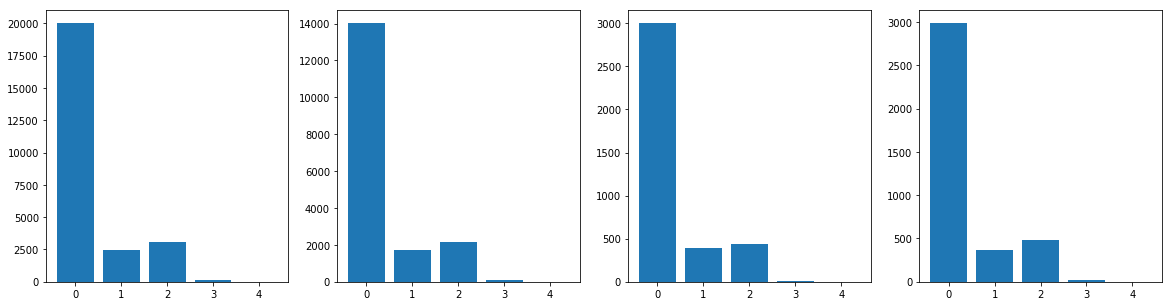

In [91]:
#import pdb
per_list = [boxes_per_patient, train_per, val_per, test_per]
# axes = df.plot.bar(rot=0, subplots=True)
# axes[1].legend(loc=2) 
fig, axes = plt.subplots(1,len(per_list), figsize=(20,5))
# ax1 = boxes_per_patient.bar()
# ax2 = plot(np.arange(1,10,1))#train_per.plot.bar()
# # ax3 = val_per.plot.bar()
# ax4 = test_per.plot.bar()

for i, ax in enumerate(axes.flatten()):
#     pdb.set_trace()
    ax.bar(dict(per_list[i]).keys(), dict(per_list[i]).values())
#     ax.set_title(per_list[i])
#     ax.set_xlabel('Number of cases')
#     ax.xaxis.set_tick_params(rotation=0)
#plt.show()

In [92]:
train_csv.to_csv(path+'train.csv')
val_csv.to_csv(path+'val.csv')
test_csv.to_csv(path+'test.csv')


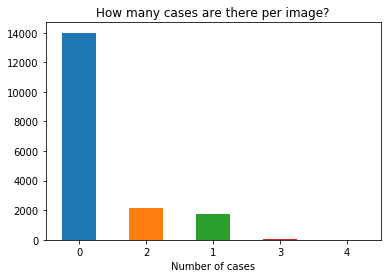

In [272]:
ax = train_per.plot.bar()
_ = ax.set_title('How many cases are there per image?')
_ = ax.set_xlabel('Number of cases')
_ = ax.xaxis.set_tick_params(rotation=0)

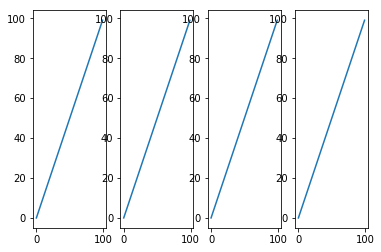

In [25]:
fig, ax = plt.subplots(1,4)
for i, ax in enumerate(ax.flat):
    ax.plot(np.arange(0,100,1))

In [100]:
df_train.loc[0, 'Target']

0

In [101]:
train_csv.shape

(20287, 8)

In [104]:
type(df_train.loc[1,'Target'])

numpy.int64

In [110]:
pID = train_csv['patientId'].iloc[1]

In [111]:
pID

'00436515-870c-4b36-a041-de91049b9ab4'

In [112]:
dicom = pydicom.dcmread(train_img_path+pID+'.dcm')
# get the image pixels
img = dicom.pixel_array

In [113]:
type(img)

numpy.ndarray

In [117]:
import cv2
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)



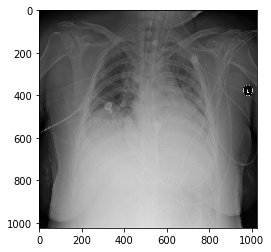

In [121]:
plt.imshow(color_img)

In [124]:
color_img.shape/2

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [126]:
import numbers
numbers.Number

numbers.Number

In [143]:
M = cv2.getRotationMatrix2D((0,0), -5,1)#(int(color_img.shape[0]/2), int(color_img.shape[1]/2)),30,1)
dst = cv2.warpAffine(color_img, M, (0,0))#(int(color_img.shape[0]/2), int(color_img.shape[1]/2)))

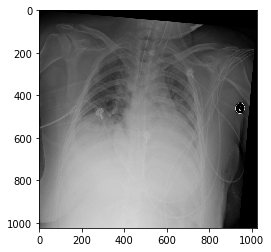

In [144]:
plt.imshow(dst)

In [138]:
dst.shape

(512, 512, 3)

In [146]:
import random
random.uniform(-5,5)

-0.39274795537743756

In [147]:
type(color_img)

numpy.ndarray

In [148]:
color_img.shape

(1024, 1024, 3)

In [150]:
from PIL import Image
PIL_img = Image.fromarray(color_img)

In [152]:
type(PIL_img)

PIL.Image.Image

In [154]:
type(PIL_img)

PIL.Image.Image

In [155]:
PIL_img[2:5,3:10]

TypeError: 'Image' object is not subscriptable